In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

cat_burrito = mpimg.imread('grayscale_cat_burrito.jpg')
cat_burrito

array([[68, 68, 67, ..., 11, 10, 10],
       [68, 68, 67, ..., 11, 11, 11],
       [68, 68, 67, ..., 11, 11, 11],
       ...,
       [45, 45, 45, ..., 68, 68, 68],
       [45, 45, 45, ..., 68, 68, 68],
       [45, 45, 45, ..., 68, 68, 68]], dtype=uint8)

In [3]:
cat_burrito.shape

(1150, 1150)

In [4]:
print(cat_burrito.max())
print(cat_burrito.min())

255
0


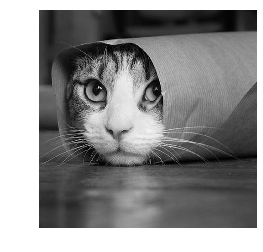

In [9]:
plt.axis('off')
plt.imshow(cat_burrito, cmap='gray');

In [11]:
color_cat_burrito = mpimg.imread('color_cat_burrito.jpg')
color_cat_burrito.shape

(1150, 1150, 3)

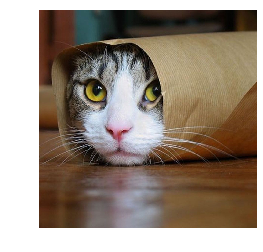

In [12]:
plt.axis('off')
plt.imshow(color_cat_burrito);

In [13]:
# flattening our grayscale cat_burrito and checking the length
len(cat_burrito.flatten())

1322500

In [14]:
import numpy as np
max_pooled = np.array([[255,255],[255,255]])
max_pooled

array([[255, 255],
       [255, 255]])

In [15]:
max_pooled.shape

(2, 2)

In [16]:
flattened = max_pooled.flatten()
flattened.shape

(4,)

In [31]:
import sys
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.utils import np_utils, plot_model
from PIL import Image
import matplotlib.pyplot as plt

In [34]:
fp = ' '

In [35]:
sys.path.append('fashion-mnist/utils/')
import mnist_reader


In [38]:
X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

In [39]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [40]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


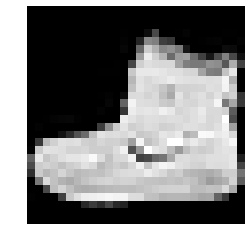

In [41]:
image_1 = X_train[0].reshape(28,28)
plt.axis('off')
plt.imshow(image_1, cmap='gray');

In [42]:
y_train[0]

9

In [43]:
mapping = {0: "T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle Boot"}

In [44]:
def show_fashion_mnist(plot_rows, plot_columns, feature_array, target_array, cmap='gray', random_seed=None):
    '''Generates a plot_rows * plot_columns grid of randomly selected images from a feature         array. Sets the title of each subplot equal to the associated index in the target array and     unencodes (i.e. title is in plain English, not numeric). Takes as optional args a color map     and a random seed. Meant for EDA.'''
    
    # Grabs plot_rows*plot_columns indices at random from X_train. 
    if random_seed is not None:
        np.random.seed(random_seed)
        
    feature_array_indices = np.random.randint(0,feature_array.shape[0], size = plot_rows*plot_columns)
    
    # Creates our plots
    fig, ax = plt.subplots(plot_rows, plot_columns, figsize=(18,18))
    
    reshaped_images_list = []

    for feature_array_index in feature_array_indices:
        # Reshapes our images, appends tuple with reshaped image and class to a reshaped_images_list.
        reshaped_image = feature_array[feature_array_index].reshape((28,28))
        image_class = mapping[target_array[feature_array_index]]
        reshaped_images_list.append((reshaped_image, image_class))
    
    # Plots each image in reshaped_images_list to its own subplot
    counter = 0
    for row in range(plot_rows):
        for col in range(plot_columns):
            ax[row,col].axis('off')
            ax[row, col].imshow(reshaped_images_list[counter][0], cmap=cmap)
            ax[row, col].set_title(reshaped_images_list[counter][1])
            counter +=1

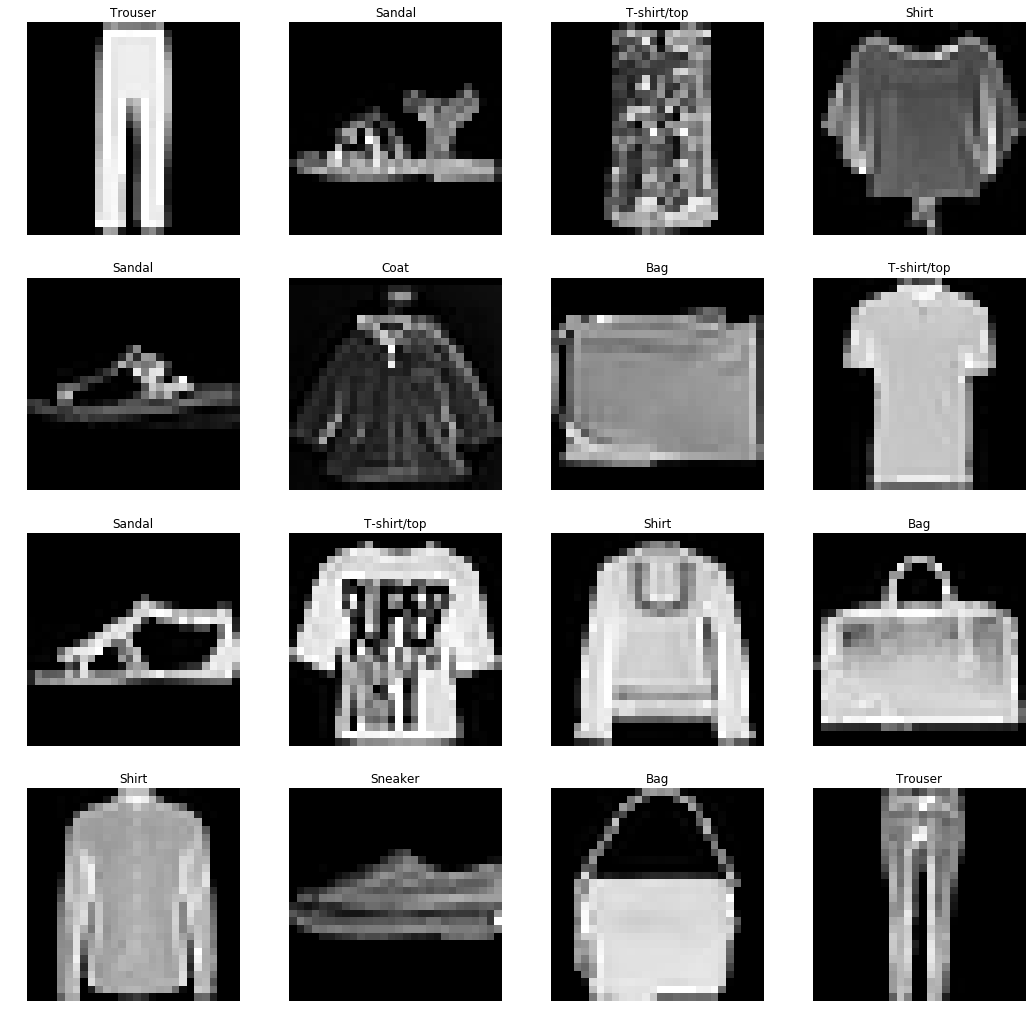

In [45]:
show_fashion_mnist(4,4, X_train, y_train, random_seed=72)

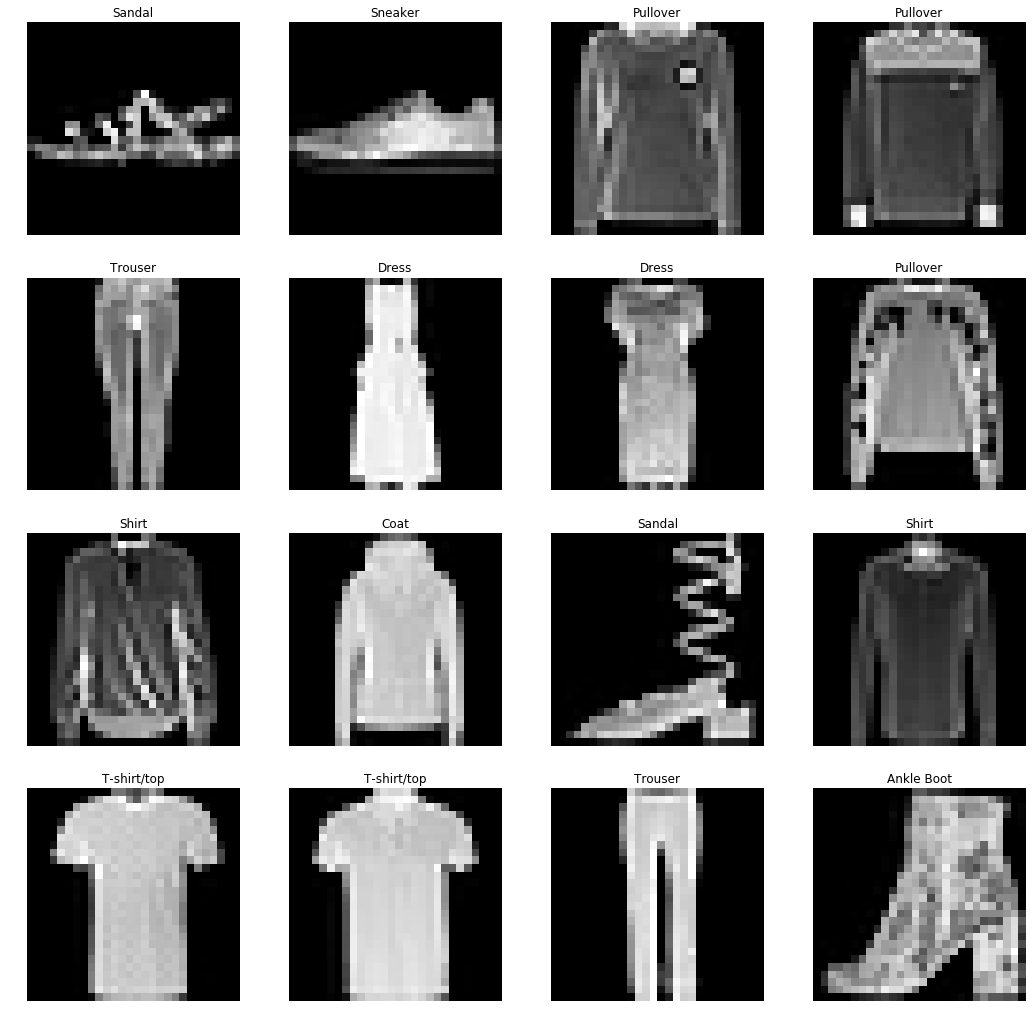

In [46]:
show_fashion_mnist(4,4, X_train, y_train)

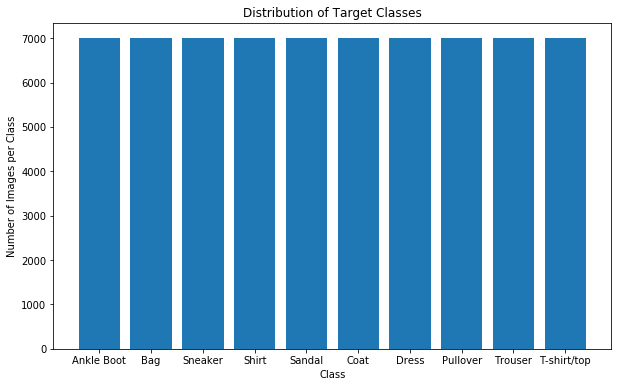

In [47]:
y = pd.Series(np.concatenate((y_train, y_test)))
plt.figure(figsize=(10,6))
plt.bar(x=[mapping[x] for x in y.value_counts().index], height = y.value_counts());
plt.xlabel("Class")
plt.ylabel("Number of Images per Class")
plt.title("Distribution of Target Classes");

In [48]:
print(X_train.max())
print(X_train.min())
print(X_test.max())
print(X_test.min())

255
0
255
0


In [49]:
# First we cast as float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Then normalize
X_train /= 255
X_test /= 255

In [50]:
print(X_train.max())
print(X_train.min())
print(X_test.max())
print(X_test.min())

1.0
0.0
1.0
0.0


In [51]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [52]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [53]:
model = Sequential()
model.add(Conv2D(filters = 35, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 35, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 45, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 35)        350       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 35)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 35)        11060     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 35)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 45)          14220     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 45)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 45)                0         
__________

In [ ]:
plot_model(model, to_file='Conv_model1.png', show_shapes=True)
Image.open('Conv_model1.png')

In [ ]:
my_fit_model = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

In [ ]:
model.summary()

In [ ]:
plt.plot(my_fit_model.history['val_loss'], label="Validation")
plt.plot(my_fit_model.history['loss'], label = "Train")
plt.xlabel("Epoch", size=15)
plt.ylabel("Cat. Crossentropy Loss", size=15)
plt.title("Conv Net Train and Validation loss over epochs", size=18)
plt.legend();

In [ ]:
plt.plot(my_fit_model.history['val_acc'], label="Validation")
plt.plot(my_fit_model.history['acc'], label = "Train")
plt.xlabel("Epoch", size=15)
plt.ylabel("Cat. Crossentropy Loss", size=15)
plt.title("Conv Net Train and Validation loss over epochs", size=18)
plt.legend();

In [ ]:
print(max(my_fit_model.history['val_acc']))
print(my_fit_model.history['val_acc'].index(max(my_fit_model.history['val_a
cc'])))

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 35, kernel_size=(3,3), input_shape=(28,28,1),
activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 35, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 45, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
my_fit_model = model.fit(X_train, y_train, epochs=25,
validation_data=(X_test, y_test))

In [ ]:
print(max(my_fit_model.history['val_acc']))
print(my_fit_model.history['val_acc'].index(max(my_fit_model.history['val_a
cc'])))